In [1717]:
import re
import pandas as pd
import numpy as np
from random import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

In [1718]:
#from google.colab import files
#files.upload()

In [1719]:
salaries = pd.read_csv("./clean_kaggle_data_2022.csv", low_memory = False, encoding = 'latin2')
salaries.shape

(8137, 298)

In [1720]:
salaries.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


# Begining: Data Reading
The main purpose of this step is to understand the meaning of each feature and the values it contains, while also considering how to process the data during the review.<p>
1. Duration: Question details. Drop;
2. Age
3. Gender
4. Country, Similar to project 1, it is divided into four parts: [low_income, lower_middle_income, upper_middle_income, high_income].
5. Current Student, 1/0
6. On which platforms have you begun or completed data science courses?\
        1. Coursera, 1/0; 2. edX, 1/0; 3. Kaggle Learn Courses, 1/0; 4. DataCampe, 1/0; 5. Fast.ai, 1/0; 6.Udacity, 1/0; 
        7. Udemy, 1/0; 8. Linkedln Learning, 1/0; 9. Cloud-certification programs, 1/0; 10. University Courses, 1/0; 
        11. None, Drop; 12. Other, Drop;
7. What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply)\
        1. University courses, 1/0; 2. Online courses, 1/0; 3. Social media platforms, 1/0; 4. Video platforms, 1/0; 5. Kaggle, 1/0;
        6. None / I do not study data science, they are not us, DROP&Remove row! 7. Other, Drop
8. Education
9. Published, 1/0
10. Did your research make use of machine learning? (select multiple)\
        1. Theoretical Research, 1/0; 2.Applied Research, 1/0 3. No.
        PS.I want to merge these three columns into one. If theoretical research has been published, the value should be 'Theoretical'; if applied research has been published, the value should be 'Applied'; if both have been published, the value should be 'Theoretical&Applied'; and if none have been published, the value should be 'Not Yet'
11. Years of Coding/Programming.
12. What programming languages do you use on a regular basis? 1/0, Drop Q12_14: None & Q12_15: Other.
13. Which of the following integrated development environments (IDE's) do you use on a regular basis? 1/0, Drop Q13_13: None & Q13_14: Other.
14. Do you use any of the following hosted notebook products?. Drop Q14_15:None & Q14_16: Other.
15. Do you use any of the following data visualization libraries on a regular basis? Drop Q15_14:None & Q15_15: Other.
16. Years of Machine Learning. Remove rows:I do not use machine learning methods. They are not us.
17. Which of the following machine learning frameworks do you use on a regular basis? Drop Q17_14:None & Q17_15: Other.
18. Which of the following ML algorithms do you use on a regular basis? Drop Q18_13: None & Q18_14: Other.
19. Which categories of computer vision methods do you use on a regular basis? Drop Q19_7: None & Q19_8: Other.
20. Which of the following natural language processing (NLP) methods do you use on a regular basis? Drop Q20_5: None & Q20_6: Other.
21. Do you download pre-trained model weights from any of the following services? 1/0
22. Which of the following ML model hubs/repositories do you use most often? 1/0
23. Title of Current role.
24. Industry
25. Size of Company
26. Approximately how many individuals are responsible for data science workloads at your place of business?
27. Does your current employer incorporate machine learning methods into their business?
28. Select any activities that make up an important part of your role at work. Drop Q28_7: None & Q28_8: Other.
29. Yearly Compensation(USD)
30. Spend on Service
31. Which of the following cloud computing platforms do you use? Drop Q31_11: None & Q31_12: Other.
32. Which Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?
33. Do you use any of the following cloud computing products? Drop Q33_4: None & Q33_5: Other.
34. Do you use any of the following data storage products? Drop Q34_7: None & Q34_8: Other.
35. Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)? Drop Q35_15: None & Q35_16: Other.
36. Do you use any of the following business intelligence tools? Drop Q36_14: None & Q36_15: Other.
37. Do you use any of the following managed machine learning products? Drop Q37_12: None & Q37_13: Other.
38. Do you use any of the following automated machine learning tools? Drop Q38_7: None & Q38_8: Other.
39. Do you use any of the following products to serve your machine learning models? Drop Q39_11: None & Q39_12: Other.
40. Do you use any tools to help monitor your machine learning models and/or experiments? Drop Q40_14:None & Q40_15: Other.
41. Do you use any of the following responsible or ethical AI products in your machine learning practices? Drop Q41_8: None & Q41_9: Other.
42. Do you use any of the following types of specialized hardware when training machine learning models? Drop Q42_8: None & Q42_9: Other.
43. Times used a TPU
44. Who/what are your favorite media sources that report on data science topics? Drop Q44_11: None & Q44_12: Other.
45. ‘Q29_buckets’ (Target Variable for Assignment 2) has been obtained by combining some salary buckets in the column ‘Q29’.
46. ‘Q29_Encoded’ has been obtained by label encoding the column ‘Q29_buckets’.



Citation<p>
Paul Mooney. 2022 Kaggle Machine Learning & Data Science Survey. https://kaggle.com/competitions/kaggle-survey-2022, 2022. Kaggle.


# Question 1: Data Cleaning

- Drop the second row since it is about the question details
- Drop other information too if they are irrelevant to the task

In [1721]:
# Create a list of column names want to drop based on Data Reading process.
columns_to_drop = [
    "Duration (in seconds)",
    "Q6_11", "Q6_12",
    "Q7_6", "Q7_7",
    "Q12_14", "Q12_15",
    "Q13_13", "Q13_14",
    "Q14_15", "Q14_16",
    "Q15_14", "Q15_15",
    "Q17_14", "Q17_15",
    "Q18_13", "Q18_14",
    "Q19_7", "Q19_8",
    "Q20_5", "Q20_6",
    "Q28_7", "Q28_8",
    "Q31_11", "Q31_12",
    "Q33_4", "Q33_5",
    "Q34_7", "Q34_8",
    "Q35_15", "Q35_16",
    "Q36_14", "Q36_15",
    "Q37_12", "Q37_13",
    "Q38_7", "Q38_8",
    "Q39_11", "Q39_12",
    "Q40_14", "Q40_15",
    "Q41_8", "Q41_9",
    "Q42_8", "Q42_9",
    "Q44_11", "Q44_12"
]

# Function to clean the data
def CleanData(df):
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    return df
# Create a new DF, to prevent modifying the original DF
salaries_encode = salaries.copy()

# Remove the first row, which contains the question text
salaries_encode = salaries_encode.drop([0])
# Clean the data
salaries_encode = CleanData(salaries_encode)

# Display column & row count
print(salaries.shape)

(8137, 298)


###**Impute missing values (single column responses)**

1. Identify columns with single column responses

2. Address missing values in those columns

In [1722]:
# Create a list of single column names
single_col_names = [col for col in salaries_encode.columns if not re.search(r'_\d+$', col)]

###Read and understand the CSV

In [1723]:
# Output the cleaned data to a new CSV file
#salaries_encode.to_csv("Check2.csv", index=False)

# Print the single column names
print(single_col_names)


['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9', 'Q11', 'Q16', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q32', 'Q43', 'Q29_Encoded', 'Q29_buckets']


###**Encode categorical features (sinlge column responses)**

In [1724]:
# Q2 - Age
salaries_encode['Q2'] = salaries_encode['Q2'].apply(
    lambda x: 1 if x == '18-21' 
    else 2 if x == '22-24' 
    else 3 if x == '25-29' 
    else 4 if x == '30-34' 
    else 5 if x == '35-39' 
    else 6 if x == '40-44' 
    else 7 if x == '45-49' 
    else 8 if x == '50-54' 
    else 9 if x == '55-59' 
    else 10 if x == '60-69' 
    else 11 if x == '70+'
    else None
)
salaries_encode.rename(columns={'Q2': 'Age'}, inplace=True)
print('Number of missing values in Age:',salaries_encode['Age'].isnull().sum())

# Q3 - Gender, replace Gender column to Sex
salaries_encode['Q3'] = salaries_encode['Q3'].apply(
    lambda x: 1 if x == 'Man' 
    else 0 if x == 'Woman'
    else None
)
salaries_encode.rename(columns={'Q3': 'Sex'}, inplace=True)

# Drop rows with missing values in 'Sex'
print('Number of missing values in Sex:', salaries_encode['Sex'].isnull().sum())
salaries_encode.dropna(subset=['Sex'], inplace=True)


Number of missing values in Age: 0
Number of missing values in Sex: 119


In [1725]:
# Q4 - Country
# Source: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
low_income_economies = [
    "Afghanistan", "Korea, Dem. People's Rep", "South Sudan", "Burkina Faso", "Liberia",
    "Sudan", "Burundi", "Madagascar", "Syrian Arab Republic", "Central African Republic",
    "Malawi", "Togo", "Chad", "Mali", "Uganda", "Congo, Dem. Rep", "Mozambique", "Yemen, Rep.",
    "Eritrea", "Niger", "Ethiopia", "Rwanda", "Gambia, The", "Sierra Leone", "Guinea-Bissau", "Somalia"
]

lower_middle_income_economies = [
    "Angola", "Honduras", "Papua New Guinea", "Bangladesh", "India", "Philippines", "Benin", 
    "Jordan", "Samoa", "Bhutan", "Kenya", "São Tomé and Principe", "Bolivia", "Kiribati", 
    "Senegal", "Cabo Verde", "Kyrgyz Republic", "Solomon Islands", "Cambodia", "Lao PDR", 
    "Sri Lanka", "Cameroon", "Lebanon", "Tajikistan", "Comoros", "Lesotho", "Tanzania", 
    "Congo, Rep.", "Mauritania", "Timor-Leste", "Côte d'Ivoire", "Micronesia, Fed. Sts.", 
    "Tunisia", "Djibouti", "Morocco", "Uzbekistan", "Egypt, Arab Rep.", "Myanmar", 
    "Vanuatu", "Eswatini", "Nepal", "Viet Nam", "Ghana", "Nicaragua", "West Bank and Gaza", 
    "Guinea", "Nigeria", "Zambia", "Haiti", "Pakistan", "Zimbabwe"
]

upper_middle_income_economies = [
    "Albania", "Equatorial Guinea", "Moldova", "Algeria", "Fiji", "Mongolia", "Argentina", 
    "Gabon", "Montenegro", "Armenia", "Georgia", "Namibia", "Azerbaijan", "Grenada", 
    "North Macedonia", "Belarus", "Guatemala", "Paraguay", "Belize", "Indonesia", "Peru", 
    "Bosnia and Herzegovina", "Iran, Islamic Rep.", "Serbia", "Botswana", "Iraq", 
    "South Africa", "Brazil", "Jamaica", "St. Lucia", "China", "Kazakhstan", 
    "St. Vincent and the Grenadines", "Colombia", "Kosovo", "Suriname", "Costa Rica", 
    "Libya", "Thailand", "Cuba", "Malaysia", "Tonga", "Dominica", "Maldives", "Türkiye", 
    "Dominican Republic", "Marshall Islands", "Turkmenistan", "Ecuador", "Mauritius", 
    "Tuvalu", "El Salvador", "Mexico", "Ukraine", 'Turkey', 'Egypt'
]

high_income_economies = [
    "American Samoa", "Gibraltar", "Palau", "Andorra", "Greece", "Panama", "Antigua and Barbuda", 
    "Greenland", "Poland", "Aruba", "Guam", "Portugal", "Australia", "Guyana", "Puerto Rico", 
    "Austria", "Hong Kong SAR, China", "Qatar", "Bahamas, The", "Hungary", "Romania", "Bahrain", 
    "Iceland", "Russian Federation", "Barbados", "Ireland", "San Marino", "Belgium", "Isle of Man", 
    "Saudi Arabia", "Bermuda", "Israel", "Seychelles", "British Virgin Islands", "Italy", 
    "Singapore", "Brunei Darussalam", "Japan", "Sint Maarten (Dutch part)", "Bulgaria", 
    "South Korea", "Slovak Republic", "Canada", "Kuwait", "Slovenia", "Cayman Islands", 
    "Latvia", "Spain", "Channel Islands", "Liechtenstein", "St. Kitts and Nevis", 
    "Chile", "Lithuania", "St. Martin (French part)", "Croatia", "Luxembourg", 
    "Sweden", "Curaçao", "Macao SAR, China", "Switzerland", "Cyprus", "Malta", "Taiwan, China", 
    "Czechia", "Monaco", "Trinidad and Tobago", "Denmark", "Nauru", "Turks and Caicos Islands", 
    "Estonia", "Netherlands", "United Arab Emirates", "Faroe Islands", "New Caledonia", 
    "United Kingdom", "Finland", "New Zealand", "United States of America", "France", 
    "Northern Mariana Islands", "Uruguay", "French Polynesia", "Norway", "Virgin Islands (U.S.)", 
    "Germany", "Oman", 'United Kingdom of Great Britain and Northern Ireland'
]

# List of top 15 countries by military expenditure in 2023 https://worldpopulationreview.com/country-rankings/most-powerful-countries
top_10_countries = ['United States of America','China','Russia', 'Germany',
                    'United Kingdom of Great Britain and Northern Ireland',
                    'South Korea','France','Japan', 'Saudi Arabia', 'United Arab Emirates']

# Function to classify countries based on the provided income lists
def classify_country_by_income(country):
    if country in high_income_economies:
        return 4
    elif country in upper_middle_income_economies:
        return 3
    elif country in lower_middle_income_economies:
        return 2
    elif country in low_income_economies:
        return 1
    else:
        return np.nan  

# Apply the function to the 'Country' column
salaries_encode['top_10_countries'] = salaries_encode['Q4'].apply(
    lambda x: 1 if x in top_10_countries 
    else 0 
)
salaries_encode.rename(columns={'top_10_countries': 'new_feature1'}, inplace=True)

# Apply the function to the 'Country' column
salaries_encode['Q4'] = salaries_encode['Q4'].apply(classify_country_by_income)
salaries_encode.rename(columns={'Q4': 'Country'}, inplace=True)

salaries_encode.dropna(subset=['Country'], inplace=True)
print('Number of missing values in Country:', salaries_encode['Country'].isnull().sum())

Number of missing values in Country: 0


In [1726]:
# Q5 - Current Student
print(salaries_encode['Q5'].value_counts())

# Drop the 'Q5' column
salaries_encode.drop(columns=['Q5'], inplace=True)

Q5
No    7230
Name: count, dtype: int64


In [1727]:
# Q8 - Education
# Education Level
def categorize_education_level(ed_level):
    
    # Categorize based on keywords
    if ed_level.lower().startswith('no formal'):
        return 1
    elif ed_level.lower().startswith('some college'):
        return 2
    elif ed_level.lower().startswith('bachelor'):
        return 3
    elif ed_level.lower().startswith('master'):
        return 4
    elif ed_level.lower().startswith('doctoral'):
        return 5
    elif ed_level.lower().startswith('professional'):
        return 6
    else:
        return None

# Apply the function to the 'EdLevel' column
salaries_encode['Q8'] = salaries_encode['Q8'].apply(categorize_education_level)
salaries_encode.rename(columns={'Q8': 'Education'}, inplace=True)

# 363 rows with missing values in Education
salaries_encode.dropna(subset=['Education'], inplace=True)

print('Number of missing values in Education:', salaries_encode['Education'].isnull().sum())

Number of missing values in Education: 0


In [1728]:
print(salaries_encode['Q32'].unique())

[nan 'They all had a similarly enjoyable developer experience'
 'Microsoft Azure' 'Alibaba Cloud' 'Amazon Web Services (AWS)'
 'None were satisfactory' 'Google Cloud Platform (GCP)' 'VMware Cloud'
 'IBM Cloud / Red Hat' 'Oracle Cloud' 'Other' 'SAP Cloud' 'Tencent Cloud']


In [1729]:
# Q9 - Published
print(salaries_encode['Q9'].value_counts())

# There are more than 2253 people did not responce this question. Thus I delete this question.
salaries_encode.drop(columns=['Q9'], inplace=True)

Q9
Yes    2326
No     2253
Name: count, dtype: int64


In [1730]:
# Q11 - Years of Coding Experience
salaries_encode['Q11'] = salaries_encode['Q11'].apply(
    lambda x: 1 if x == 'I have never written code' 
    else 2 if x == '< 1 years' 
    else 3 if x == '1-3 years' 
    else 4 if x == '3-5 years' 
    else 5 if x == '5-10 years' 
    else 6 if x == '10-20 years' 
    else 7 if x == '20+ years'
    else None
)
salaries_encode.rename(columns={'Q11': 'Years_coding'}, inplace=True)
print('Number of missing values in Years_coding:', salaries_encode['Years_coding'].isnull().sum())

# Q16 - Years of ML Experience
salaries_encode['Q16'] = salaries_encode['Q16'].apply(
    lambda x: 1 if x == 'I do not use machine learning methods' 
    else 2 if x == 'Under 1 year' 
    else 3 if x == '1-2 years' 
    else 4 if x == '2-3 years' 
    else 5 if x == '3-4 years' 
    else 6 if x == '4-5 years' 
    else 7 if x == '5-10 years' 
    else 8 if x == '10-20 years' 
    else None
)
salaries_encode.rename(columns={'Q16': 'Years_ML'}, inplace=True)
# 527 missing value
print('Number of missing values in Years_ML:', salaries_encode['Years_ML'].isnull().sum())
salaries_encode.dropna(subset=['Years_ML'], inplace=True)


# Q22 - ML models
salaries_encode.rename(columns={'Q22': 'ML_models'}, inplace=True)
print('Number of missing values in ML_models:', salaries_encode['ML_models'].isnull().sum())
# There are 4948 missing values in ML_models. Thus I drop this column.
salaries_encode.drop(columns=['ML_models'], inplace=True)

Number of missing values in Years_coding: 0
Number of missing values in Years_ML: 572
Number of missing values in ML_models: 4948


In [1731]:
# Q23 - Current Role
for role in salaries_encode['Q23'].unique():
    column_name = f"Q23_{role.replace(' ', '_').replace('/', '_')}"
    salaries_encode[column_name] = salaries_encode['Q23'].apply(lambda x: 1 if x == role else 0)


# Drop the 'Q23' column and ‘Q23_Other’ column
salaries_encode.drop(['Q23', 'Q23_Other'], axis=1, inplace=True, errors='ignore')
q23_columns = [col for col in salaries_encode.columns if 'Q23' in col]

# Check the missing values in the columns
missing_values_q23 = salaries_encode[q23_columns].isnull().sum()
missing_values_q23


Q23_Data_Scientist                                                      0
Q23_Software_Engineer                                                   0
Q23_Research_Scientist                                                  0
Q23_Developer_Advocate                                                  0
Q23_Data_Analyst_(Business,_Marketing,_Financial,_Quantitative,_etc)    0
Q23_Data_Engineer                                                       0
Q23_Machine_Learning__MLops_Engineer                                    0
Q23_Engineer_(non-software)                                             0
Q23_Teacher___professor                                                 0
Q23_Manager_(Program,_Project,_Operations,_Executive-level,_etc)        0
Q23_Data_Administrator                                                  0
Q23_Statistician                                                        0
Q23_Data_Architect                                                      0
dtype: int64

In [1732]:
# Q24 - Industry
for role in salaries_encode['Q24'].unique():
    column_name = f"Q24_{role.replace(' ', '_').replace('/', '_')}"
    salaries_encode[column_name] = salaries_encode['Q24'].apply(lambda x: 1 if x == role else 0)


# Drop the 'Q23' column and ‘Q23_Other’ column
salaries_encode.drop(['Q24', 'Q24_Other'], axis=1, inplace=True, errors='ignore')
q24_columns = [col for col in salaries_encode.columns if 'Q24' in col]

# Check the missing values in the columns
missing_values_q24 = salaries_encode[q24_columns].isnull().sum()
missing_values_q24

Q24_Online_Service_Internet-based_Services    0
Q24_Insurance_Risk_Assessment                 0
Q24_Government_Public_Service                 0
Q24_Computers_Technology                      0
Q24_Accounting_Finance                        0
Q24_Academics_Education                       0
Q24_Medical_Pharmaceutical                    0
Q24_Marketing_CRM                             0
Q24_Manufacturing_Fabrication                 0
Q24_Retail_Sales                              0
Q24_Non-profit_Service                        0
Q24_Energy_Mining                             0
Q24_Broadcasting_Communications               0
Q24_Shipping_Transportation                   0
dtype: int64

In [1733]:
# Q25 - Company Size
salaries_encode['Q25'] = salaries_encode['Q25'].apply(
    lambda x: 1 if x == '0-49 employees'
    else 2 if x == '50-249 employees'
    else 3 if x == '250-999 employees'
    else 4 if x == '1000-9,999 employees'
    else 5 if x == '10,000 or more employees'
    else None
)
salaries_encode.rename(columns={'Q25': 'Company_Size'}, inplace=True)
print('Number of missing values in Company_Size:', salaries_encode['Company_Size'].isnull().sum())


# Q26 - Team Size (Excel sheet set the row to Month, so I changed it to Team Size)
salaries_encode['Q26'] = salaries_encode['Q26'].apply(
    lambda x: 1 if x == '0' 
    else 2 if x == '2-Jan' 
    else 3 if x == '4-Mar' 
    else 4 if x == '9-May' 
    else 5 if x == '14-Oct' 
    else 6 if x == '15-19' 
    else 7 if x == '20+'
    else None
)
salaries_encode.rename(columns={'Q26': 'Team_Size'}, inplace=True)
print('Number of missing values in Team_Size:', salaries_encode['Team_Size'].isnull().sum())

Number of missing values in Company_Size: 0
Number of missing values in Team_Size: 0


In [1734]:
# Q27 - Incorporate ML
for role in salaries_encode['Q27'].unique():
    column_name = f"Q27_{role.replace(' ', '_').replace('/', '_')}"
    salaries_encode[column_name] = salaries_encode['Q27'].apply(lambda x: 1 if x == role else 0)


# Drop the 'Q23' column and ‘Q23_Other’ column
salaries_encode.drop(['Q27', 'Q27_I_do_not_know '], axis=1, inplace=True, errors='ignore')
q27_columns = [col for col in salaries_encode.columns if 'Q27' in col]

# Check the missing values in the columns
missing_values_q27 = salaries_encode[q27_columns].isnull().sum()
missing_values_q27

Q27_We_recently_started_using_ML_methods_(i.e.,_models_in_production_for_less_than_2_years)      0
Q27_We_have_well_established_ML_methods_(i.e.,_models_in_production_for_more_than_2_years)       0
Q27_We_are_exploring_ML_methods_(and_may_one_day_put_a_model_into_production)                    0
Q27_I_do_not_know                                                                                0
Q27_No_(we_do_not_use_ML_methods)                                                                0
Q27_We_use_ML_methods_for_generating_insights_(but_do_not_put_working_models_into_production)    0
dtype: int64

In [1735]:
# Q30 - Money Spent on ML
salaries_encode['Q30'] = salaries_encode['Q30'].apply(
    lambda x: 1 if x == '$0 ($USD)' 
    else 2 if x == '$1-$99' 
    else 3 if x == '$100-$999' 
    else 4 if x == '$1000-$9,999' 
    else 5 if x == '$10,000-$99,999' 
    else 6 if x == '$100,000 or more ($USD)'
    else None
)
salaries_encode.rename(columns={'Q30': 'Money_Spent_ML'}, inplace=True)
# 38 missing value 
salaries_encode.dropna(subset=['Money_Spent_ML'], inplace=True)
print('Number of missing values in Money_Spent_ML:', salaries_encode['Money_Spent_ML'].isnull().sum())


# Q32 - Cloud Platforms
salaries_encode.rename(columns={'Q32': 'Cloud_Platforms'}, inplace=True)
print('Number of missing values in Cloud_Platforms:', salaries_encode['Cloud_Platforms'].isnull().sum())

# There are 4696 missing values in Cloud_Platforms. So I drop this column.
salaries_encode.drop(columns=['Cloud_Platforms'], inplace=True)

# Q43 - TPU Times
salaries_encode.rename(columns={'Q43': 'TPU_Times'}, inplace=True)
print('Number of missing values in TPU_Times:', salaries_encode['TPU_Times'].isnull().sum())

# There are 2529 missing values in TPU_Times. So I drop this column.
salaries_encode.drop(columns=['TPU_Times'], inplace=True)

Number of missing values in Money_Spent_ML: 0
Number of missing values in Cloud_Platforms: 4658
Number of missing values in TPU_Times: 2491


In [1736]:
salaries_encode.shape

(6257, 277)

###**Handling categorical features (multi column responses)**

In [1737]:
# Obtain the multi-column names
multi_col_names = [ col for col in salaries_encode.columns if col not in single_col_names and col.startswith('Q')]

# Display the multi-column names
print(multi_col_names)

['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 

###Q6 Platforms begun or completed DS

In [1738]:
# Obtain the Q6 columns
q6_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q6')]

# Replace the Q6 columns with the encoded values
salaries_encode[q6_columns] = salaries_encode[q6_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q6_columns:', salaries_encode[q6_columns].isnull().sum())


Number of missing values in q6_columns: Q6_1     0
Q6_2     0
Q6_3     0
Q6_4     0
Q6_5     0
Q6_6     0
Q6_7     0
Q6_8     0
Q6_9     0
Q6_10    0
dtype: int64


###Q7 Products or Platforms most helpful

In [1739]:
# Obtain the Q7 columns
q7_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q7')]

# Replace the Q6 columns with the encoded values
salaries_encode[q7_columns] = salaries_encode[q7_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q7_columns:', salaries_encode[q7_columns].isnull().sum())


Number of missing values in q7_columns: Q7_1    0
Q7_2    0
Q7_3    0
Q7_4    0
Q7_5    0
dtype: int64


###Q10 Rearch(Theoretical/Applied/NO)

In [1740]:
# Obtain the Q10 columns
q10_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q10')]

# Replace the Q10 columns with the encoded values
salaries_encode[q10_columns] = salaries_encode[q10_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q10_columns:', salaries_encode[q10_columns].isnull().sum())


Number of missing values in q10_columns: Q10_1    0
Q10_2    0
Q10_3    0
dtype: int64


###Q12 Language 

In [1741]:
# Obatin the Q12 columns
q12_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q12')]

# Replace the Q12 columns with the encoded values
salaries_encode[q12_columns] = salaries_encode[q12_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q12_columns:', salaries_encode[q12_columns].isnull().sum())


Number of missing values in q12_columns: Q12_1     0
Q12_2     0
Q12_3     0
Q12_4     0
Q12_5     0
Q12_6     0
Q12_7     0
Q12_8     0
Q12_9     0
Q12_10    0
Q12_11    0
Q12_12    0
Q12_13    0
dtype: int64


###Q13 Development Environments

In [1742]:
# Obtain the Q13 columns
q13_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q13')]

# Replace the Q13 columns with the encoded values
salaries_encode[q13_columns] = salaries_encode[q13_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q13_columns:', salaries_encode[q13_columns].isnull().sum())

Number of missing values in q13_columns: Q13_1     0
Q13_2     0
Q13_3     0
Q13_4     0
Q13_5     0
Q13_6     0
Q13_7     0
Q13_8     0
Q13_9     0
Q13_10    0
Q13_11    0
Q13_12    0
dtype: int64


###Q14 Hosted Notebook

In [1743]:
# Obtain the Q14 columns
q14_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q14')]

# Replace the Q14 columns with the encoded values
salaries_encode[q14_columns] = salaries_encode[q14_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q14_columns:', salaries_encode[q14_columns].isnull().sum())

Number of missing values in q14_columns: Q14_1     0
Q14_2     0
Q14_3     0
Q14_4     0
Q14_5     0
Q14_6     0
Q14_7     0
Q14_8     0
Q14_9     0
Q14_10    0
Q14_11    0
Q14_12    0
Q14_13    0
Q14_14    0
dtype: int64


###Q15 Data Visualization Libraries

In [1744]:
# Obtain the Q15 columns
q15_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q15')]

# Replace the Q15 columns with the encoded values
salaries_encode[q15_columns] = salaries_encode[q15_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q15_columns:', salaries_encode[q15_columns].isnull().sum())

Number of missing values in q15_columns: Q15_1     0
Q15_2     0
Q15_3     0
Q15_4     0
Q15_5     0
Q15_6     0
Q15_7     0
Q15_8     0
Q15_9     0
Q15_10    0
Q15_11    0
Q15_12    0
Q15_13    0
dtype: int64


###Q17 ML Frameworks

In [1745]:
# Obtain the Q17 columns
q17_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q17')]

# Replace the Q17 columns with the encoded values
salaries_encode[q17_columns] = salaries_encode[q17_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q17_columns:', salaries_encode[q17_columns].isnull().sum())

Number of missing values in q17_columns: Q17_1     0
Q17_2     0
Q17_3     0
Q17_4     0
Q17_5     0
Q17_6     0
Q17_7     0
Q17_8     0
Q17_9     0
Q17_10    0
Q17_11    0
Q17_12    0
Q17_13    0
dtype: int64


###Q18 ML Algorithms

In [1746]:
# Obtain the Q18 columns
q18_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q18')]

# Replace the Q18 columns with the encoded values
salaries_encode[q18_columns] = salaries_encode[q18_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q18_columns:', salaries_encode[q18_columns].isnull().sum())

Number of missing values in q18_columns: Q18_1     0
Q18_2     0
Q18_3     0
Q18_4     0
Q18_5     0
Q18_6     0
Q18_7     0
Q18_8     0
Q18_9     0
Q18_10    0
Q18_11    0
Q18_12    0
dtype: int64


###Q19 Computer Vision Methods

In [1747]:
# Obtain the Q19 columns
q19_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q19')]

# Replace the Q19 columns with the encoded values
salaries_encode[q19_columns] = salaries_encode[q19_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q19_columns:', salaries_encode[q19_columns].isnull().sum())

Number of missing values in q19_columns: Q19_1    0
Q19_2    0
Q19_3    0
Q19_4    0
Q19_5    0
Q19_6    0
dtype: int64


###Q20 NLP Methods

In [1748]:
# Obtain the Q20 columns
q20_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q20')]

# Replace the Q20 columns with the encoded values
salaries_encode[q20_columns] = salaries_encode[q20_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q20_columns:', salaries_encode[q20_columns].isnull().sum())

Number of missing values in q20_columns: Q20_1    0
Q20_2    0
Q20_3    0
Q20_4    0
dtype: int64


###Q21 Download Pre-trained Model Weights

In [1749]:
# Obtain the Q21 columns
q21_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q21')]

# Replace the Q21 columns with the encoded values
salaries_encode[q21_columns] = salaries_encode[q21_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q21_columns:', salaries_encode[q21_columns].isnull().sum())

Number of missing values in q21_columns: Q21_1     0
Q21_2     0
Q21_3     0
Q21_4     0
Q21_5     0
Q21_6     0
Q21_7     0
Q21_8     0
Q21_9     0
Q21_10    0
dtype: int64


###Q28 Important Activities

In [1750]:
# Obtain the Q28 columns
q28_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q28')]

# Replace the Q28 columns with the encoded values
salaries_encode[q28_columns] = salaries_encode[q28_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q28_columns:', salaries_encode[q28_columns].isnull().sum())

Number of missing values in q28_columns: Q28_1    0
Q28_2    0
Q28_3    0
Q28_4    0
Q28_5    0
Q28_6    0
dtype: int64


###Q31 Cloud Computing Platforms

In [1751]:
# Obtain the Q31 columns
q31_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q31')]

# Replace the Q31 columns with the encoded values
salaries_encode[q31_columns] = salaries_encode[q31_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q31_columns:', salaries_encode[q31_columns].isnull().sum())

Number of missing values in q31_columns: Q31_1     0
Q31_2     0
Q31_3     0
Q31_4     0
Q31_5     0
Q31_6     0
Q31_7     0
Q31_8     0
Q31_9     0
Q31_10    0
dtype: int64


###Q33 Do you use Cloud Computing Platforms

In [1752]:
# Obtain the Q33 columns
q33_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q33')]

# Replace the Q33 columns with the encoded values
salaries_encode[q33_columns] = salaries_encode[q33_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q33_columns:', salaries_encode[q33_columns].isnull().sum())

Number of missing values in q33_columns: Q33_1    0
Q33_2    0
Q33_3    0
dtype: int64


###Q34 Data Storage Products

In [1753]:
# Obtain the Q34 columns
q34_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q34')]

# Replace the Q34 columns with the encoded values
salaries_encode[q34_columns] = salaries_encode[q34_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q34_columns:', salaries_encode[q34_columns].isnull().sum())

Number of missing values in q34_columns: Q34_1    0
Q34_2    0
Q34_3    0
Q34_4    0
Q34_5    0
Q34_6    0
dtype: int64


###Q35 Data Products

In [1754]:
# Obtain the Q35 columns
q35_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q35')]

# Replace the Q35 columns with the encoded values
salaries_encode[q35_columns] = salaries_encode[q35_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q35_columns:', salaries_encode[q35_columns].isnull().sum())

Number of missing values in q35_columns: Q35_1     0
Q35_2     0
Q35_3     0
Q35_4     0
Q35_5     0
Q35_6     0
Q35_7     0
Q35_8     0
Q35_9     0
Q35_10    0
Q35_11    0
Q35_12    0
Q35_13    0
Q35_14    0
dtype: int64


###Q36 BI Tools

In [1755]:
# Obtain the Q36 columns
q36_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q36')]

# Replace the Q36 columns with the encoded values
salaries_encode[q36_columns] = salaries_encode[q36_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q36_columns:', salaries_encode[q36_columns].isnull().sum())

Number of missing values in q36_columns: Q36_1     0
Q36_2     0
Q36_3     0
Q36_4     0
Q36_5     0
Q36_6     0
Q36_7     0
Q36_8     0
Q36_9     0
Q36_10    0
Q36_11    0
Q36_12    0
Q36_13    0
dtype: int64


###Q37 Managed ML Products

In [1756]:
# Obtain the Q37 columns
q37_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q37')]

# Replace the Q37 columns with the encoded values
salaries_encode[q37_columns] = salaries_encode[q37_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q37_columns:', salaries_encode[q37_columns].isnull().sum())

Number of missing values in q37_columns: Q37_1     0
Q37_2     0
Q37_3     0
Q37_4     0
Q37_5     0
Q37_6     0
Q37_7     0
Q37_8     0
Q37_9     0
Q37_10    0
Q37_11    0
dtype: int64


###Q38 Automated ML Tools

In [1757]:
# Obtain the Q38 columns
q38_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q38')]

# Replace the Q38 columns with the encoded values
salaries_encode[q38_columns] = salaries_encode[q38_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q38_columns:', salaries_encode[q38_columns].isnull().sum())

Number of missing values in q38_columns: Q38_1    0
Q38_2    0
Q38_3    0
Q38_4    0
Q38_5    0
Q38_6    0
dtype: int64


###Q39 Products To Serve Your ML Models

In [1758]:
# Obtain the Q39 columns
q39_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q39')]

# Replace the Q39 columns with the encoded values
salaries_encode[q39_columns] = salaries_encode[q39_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q39_columns:', salaries_encode[q39_columns].isnull().sum())  

Number of missing values in q39_columns: Q39_1     0
Q39_2     0
Q39_3     0
Q39_4     0
Q39_5     0
Q39_6     0
Q39_7     0
Q39_8     0
Q39_9     0
Q39_10    0
dtype: int64


###Q40 Monitor ML Models

In [1759]:
# Obtain the Q40 columns
q40_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q40')]

# Replace the Q40 columns with the encoded values
salaries_encode[q40_columns] = salaries_encode[q40_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q40_columns:', salaries_encode[q40_columns].isnull().sum())

Number of missing values in q40_columns: Q40_1     0
Q40_2     0
Q40_3     0
Q40_4     0
Q40_5     0
Q40_6     0
Q40_7     0
Q40_8     0
Q40_9     0
Q40_10    0
Q40_11    0
Q40_12    0
Q40_13    0
dtype: int64


###Q41 Ethical AI

In [1760]:
# Obtain the Q41 columns
q41_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q41')]

# Replace the Q41 columns with the encoded values
salaries_encode[q41_columns] = salaries_encode[q41_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q41_columns:', salaries_encode[q41_columns].isnull().sum())

Number of missing values in q41_columns: Q41_1    0
Q41_2    0
Q41_3    0
Q41_4    0
Q41_5    0
Q41_6    0
Q41_7    0
dtype: int64


###Q42 Hardware

In [1761]:
# Obtain the Q42 columns
q42_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q42')]

# Replace the Q42 columns with the encoded values
salaries_encode[q42_columns] = salaries_encode[q42_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q42_columns:', salaries_encode[q42_columns].isnull().sum())

Number of missing values in q42_columns: Q42_1    0
Q42_2    0
Q42_3    0
Q42_4    0
Q42_5    0
Q42_6    0
Q42_7    0
dtype: int64


###Q44 Media Sources

In [1762]:
# Obtain the Q44 columns
q44_columns = salaries_encode.columns[salaries_encode.columns.str.startswith('Q44')]

# Replace the Q44 columns with the encoded values
salaries_encode[q44_columns] = salaries_encode[q44_columns].applymap(
    lambda x: 1 if isinstance(x, str) else 0
)
print('Number of missing values in q44_columns:', salaries_encode[q44_columns].isnull().sum())

Number of missing values in q44_columns: Q44_1     0
Q44_2     0
Q44_3     0
Q44_4     0
Q44_5     0
Q44_6     0
Q44_7     0
Q44_8     0
Q44_9     0
Q44_10    0
dtype: int64


###Output CSV And check

In [1763]:
# Output the cleaned data to a new CSV file
# salaries_encode.to_csv("check4.csv", index=False)

###Drop Columns, And Replace Missing

In [1764]:
# Step 1: Drop the unencoded target column
columns_to_drop = ['Q29']
salaries_encode = salaries_encode.drop(columns=columns_to_drop, errors='ignore')

# Step 2: Impute missing values for columns with mode
for col in salaries_encode.columns:
    if salaries_encode[col].isnull().sum() > 0:
        mode_value = salaries_encode[col].mode()[0]
        salaries_encode[col].fillna(mode_value, inplace=True)

# Step 3: Verify that there are no remaining missing values
missing_values = salaries_encode.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values)
else: 
    print("There are no missing values remaining.")
    
# Step 4: Display the column names and shape of the data
print("Shape of the data:", salaries_encode.shape)


There are no missing values remaining.
Shape of the data: (6257, 276)


###**Drop the target variable(s) and get the target variable**

In [1765]:
# Make sure there are no missing values remaining in the dataset
assert salaries_encode.isnull().values.sum() == 0, \
    "There are still {} missing values remaining in salaries!".format(
        salaries_encode.isnull().values.sum()
    )

In [1766]:
# Set the target variable
target = salaries_encode['Q29_Encoded']

#TODO: Drop the target variables from the feature set
columns_to_drop = ['Q29_buckets', 'Q29_Encoded']
X = salaries_encode.drop(columns=columns_to_drop)

# Make sure the target variables are not included in the feature set
for col in X.columns:
    assert 'Q29' not in col, \
        "Target variable ({}) is still in the dataset".format(col)

# Question 2: Exploratory Feature Analysis

- From Question 2 - Question 4, you should **NOT** peek at the test labels in any form!
- Assume that you do not know the target values (Q29_Encoded)

## Split data into training and test sets

In [1767]:
# You can use from sklearn.model_selection.train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=1624)

## **Feature Importance**


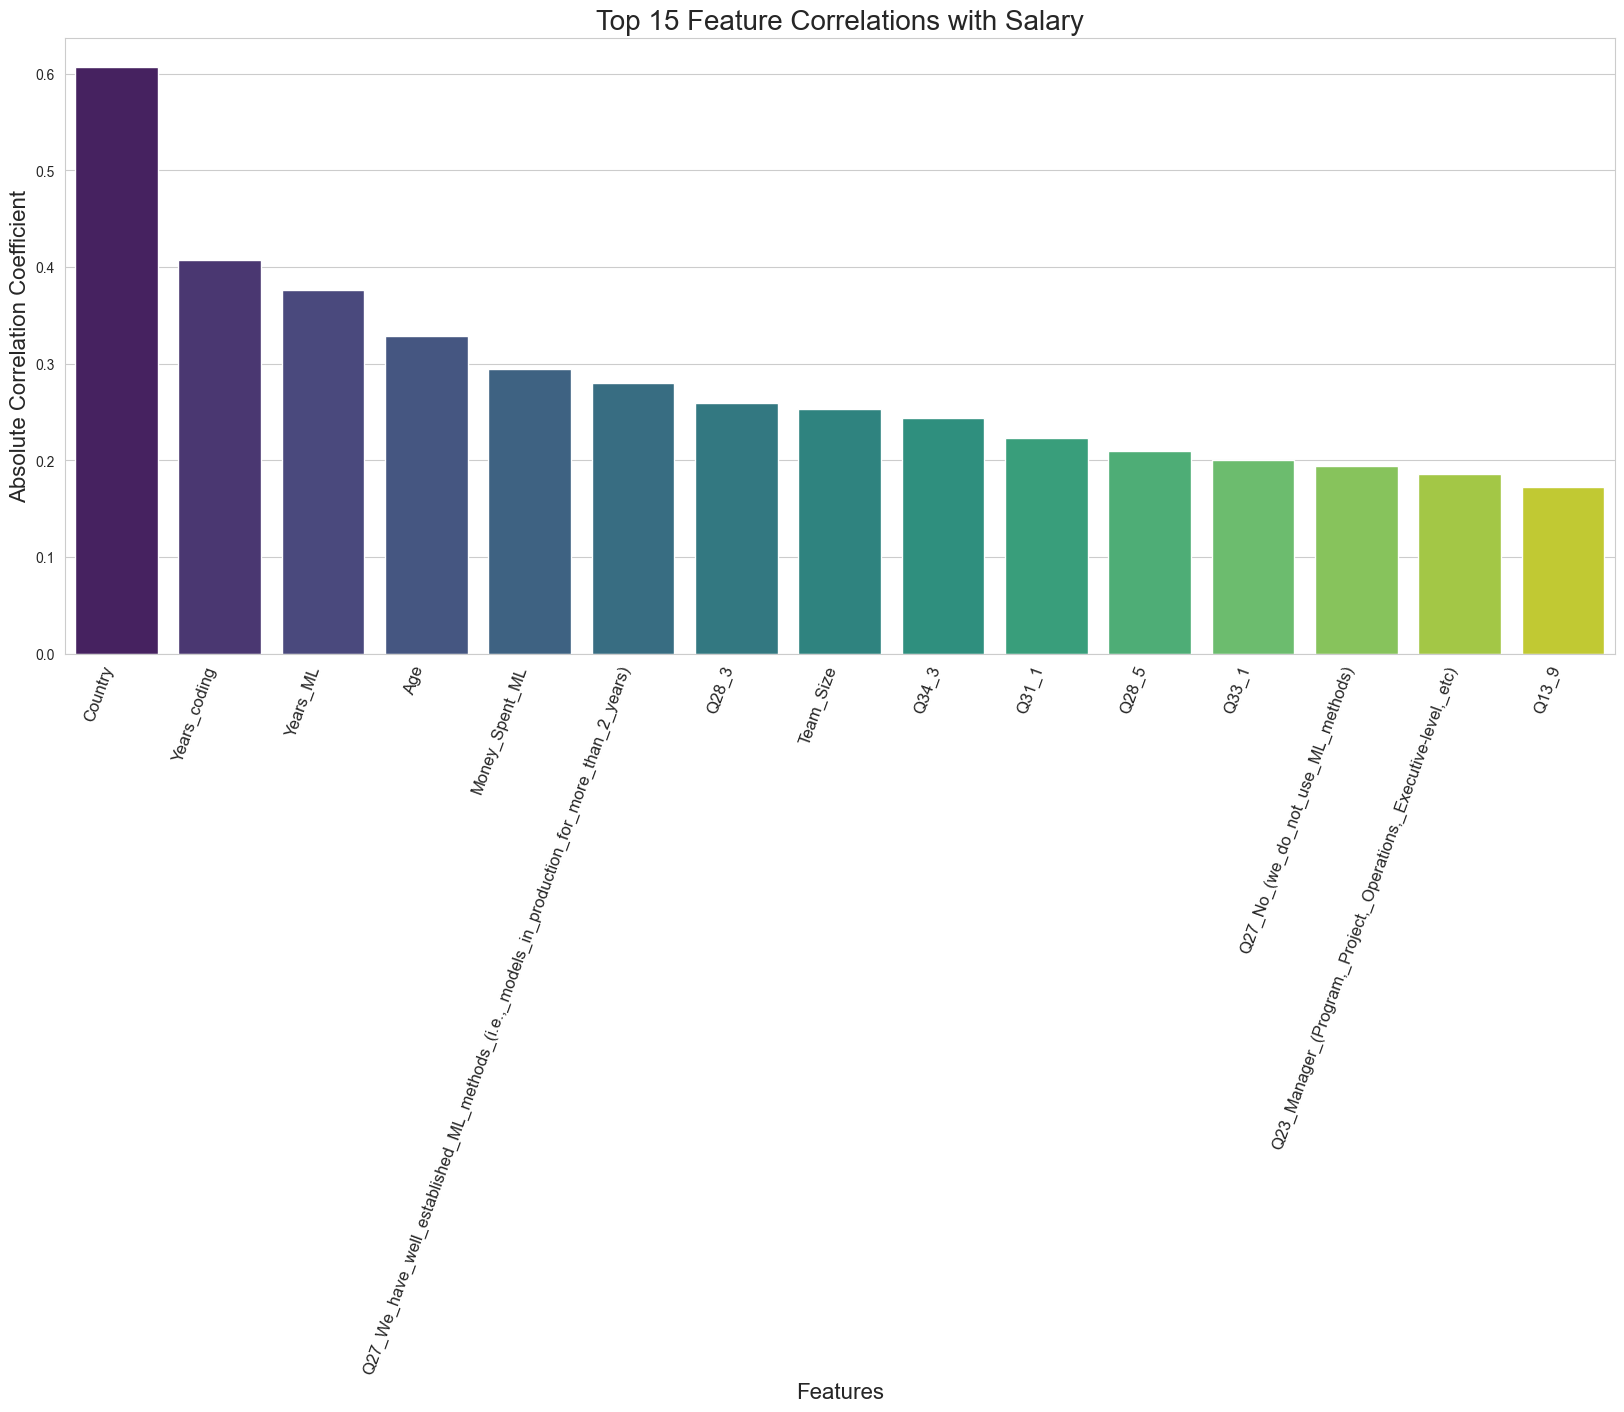

In [1768]:
# Create a copy of the encoded salaries DataFrame
salaries = salaries_encode.copy()

# Drop Q29_buckets and new_feature1 columns which not belong to the original dataset
salaries.drop(columns=['Q29_buckets', 'new_feature1'], inplace=True)

# Compute the correlation matrix
df_corr = salaries.corr()

# Get the absolute correlations with the target variable 'Q29_Encoded' and sort them in descending order
# Exclude the target variable itself from the list
corr_with_target = df_corr['Q29_Encoded'].drop('Q29_Encoded').abs().sort_values(ascending=False)

# Select the top 15 features most correlated with the target variable
top15_corr = corr_with_target.head(15)

# Create a DataFrame for plotting
corr_df = pd.DataFrame({
    'Feature': top15_corr.index,
    'Correlation': top15_corr.values
})

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the top 15 correlations
plt.figure(figsize=(20, 8))
plt.title('Top 15 Feature Correlations with Salary', fontsize=20)

# Create the bar plot
corrplot = sns.barplot(
    x='Feature',
    y='Correlation',
    data=corr_df,
    palette='viridis'
)

# Rotate x-axis labels for better readability
corrplot.set_xticklabels(
    corrplot.get_xticklabels(),
    rotation=70,
    horizontalalignment='right',
    fontsize=12
)

# Set labels for axes
plt.xlabel('Features', fontsize=16)
plt.ylabel('Absolute Correlation Coefficient', fontsize=16)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

## **Feature Engineering/Generation**

- Create new feature(s) using existing features!

- (1) identifying if respondents are from the top 10 most economics powerful countries, emphasizing geographical impact; (2) the ratio of coding years to age, indicating early coding exposure; (3) the ratio of ML experience to coding experience, showing ML specialization; (4) total languages used sum of Q12 features, representing versatility in programming skills; (5) total data products worked on sum of Q34 & Q35 features, reflecting practical experience; and (6) data science team size relative to company size, showing the focus on data science within the company. 

In [1769]:
#TODO: Create new features (feature generation)
# 1 - Top 10 Powerful countries
X_train['new_feature1'] = X_train['new_feature1']

# 2 - Years of coding / age ratio
X_train['new_feature2'] = X_train['Years_coding'] / X_train['Age']

# 3 - Years of ML experience / Years of coding ratio
X_train['new_feature3'] = X_train['Years_ML'] / X_train['Years_coding']

# 4- Total languages Used Q12
q12_columns = X_train.columns[X_train.columns.str.startswith('Q12')]
X_train['new_feature4'] = X_train[q12_columns].sum(axis=1)
714
# 5 - Total Data products Q34 & Q35
q34_columns = X_train.columns[X_train.columns.str.startswith('Q34')]
q35_columns = X_train.columns[X_train.columns.str.startswith('Q35')]
X_train['new_feature5'] = X_train[q34_columns].sum(axis=1) + X_train[q35_columns].sum(axis=1)

# 6 - Company Data Science Ratio Q26/Q25 * 100
X_train['new_feature6'] = (X_train['Team_Size'] / X_train['Company_Size']) * 100

## **Feature Selection**

- Select the features based on the criteria of your choice

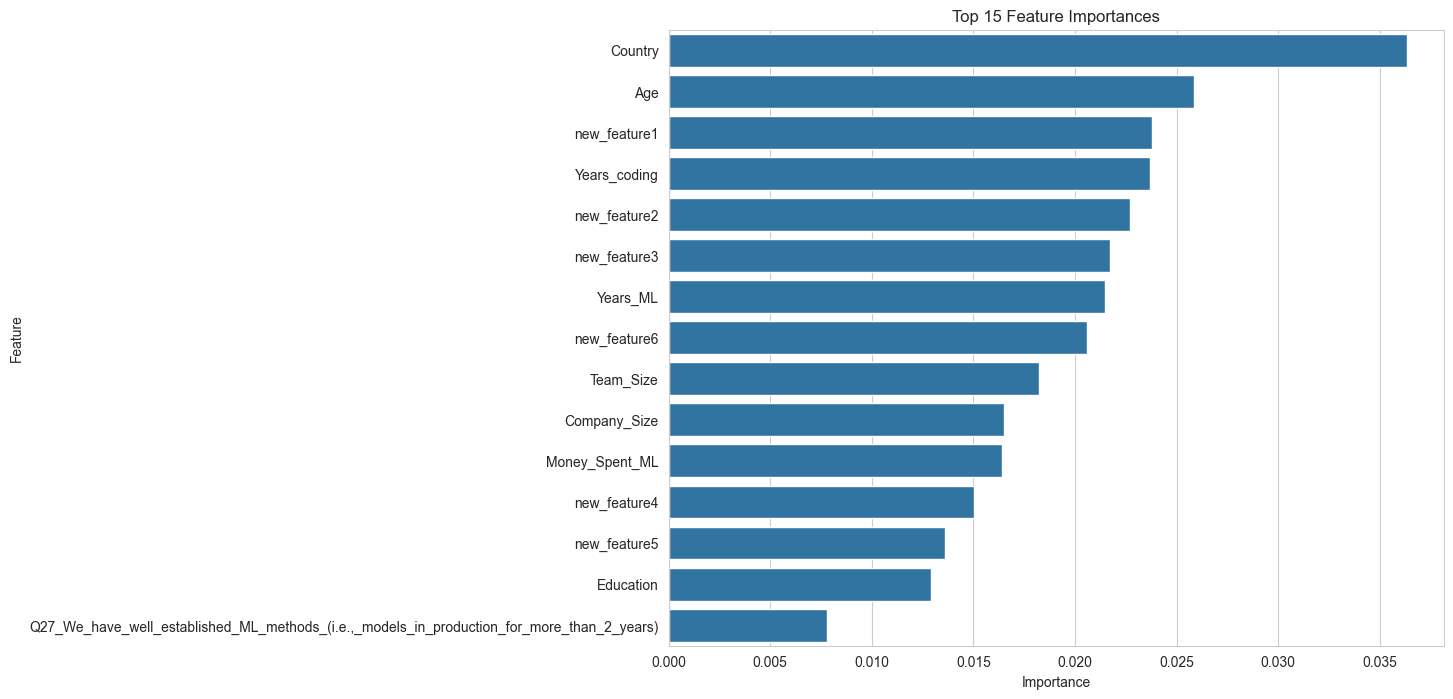

In [1770]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=1000, random_state=1624, n_jobs=-1)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X_train.columns,'Importance': importances})

# Sort features by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize the top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance',y='Feature',data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.show()

In [1771]:
# Select the top 15 features
train_df_selected = feature_importances['Feature'].head(15).tolist()
print(train_df_selected)

# Update the training sets
X_train_selected = X_train[train_df_selected]

['Country', 'Age', 'new_feature1', 'Years_coding', 'new_feature2', 'new_feature3', 'Years_ML', 'new_feature6', 'Team_Size', 'Company_Size', 'Money_Spent_ML', 'new_feature4', 'new_feature5', 'Education', 'Q27_We_have_well_established_ML_methods_(i.e.,_models_in_production_for_more_than_2_years)']


## **Apply the same feature engineering/selection to test data**

In [1772]:
#TODO: Feature generation code you applied to the training data
# 1 - Top 10 Powerful countries
X_test['new_feature1'] = X_test['new_feature1']

# 2 - Years of coding / age ratio
X_test['new_feature2'] = X_test['Years_coding'] / X_test['Age']

# 3 - Years of ML experience / Years of coding ratio
X_test['new_feature3'] = X_test['Years_ML'] / X_test['Years_coding']

# 3- Total languages Used Q12
q12_columns = X_test.columns[X_test.columns.str.startswith('Q12')]
X_test['new_feature4'] = X_test[q12_columns].sum(axis=1)

# 4 - Total Data products Q34 & Q35
q34_columns = X_test.columns[X_test.columns.str.startswith('Q34')]
q35_columns = X_test.columns[X_test.columns.str.startswith('Q35')]
X_test['new_feature5'] = X_test[q34_columns].sum(axis=1) + X_test[q35_columns].sum(axis=1)

# 5 - Company Data Science Ratio Q26/Q25 * 100
X_test['new_feature6'] = (X_test['Team_Size'] / X_test['Company_Size']) * 100

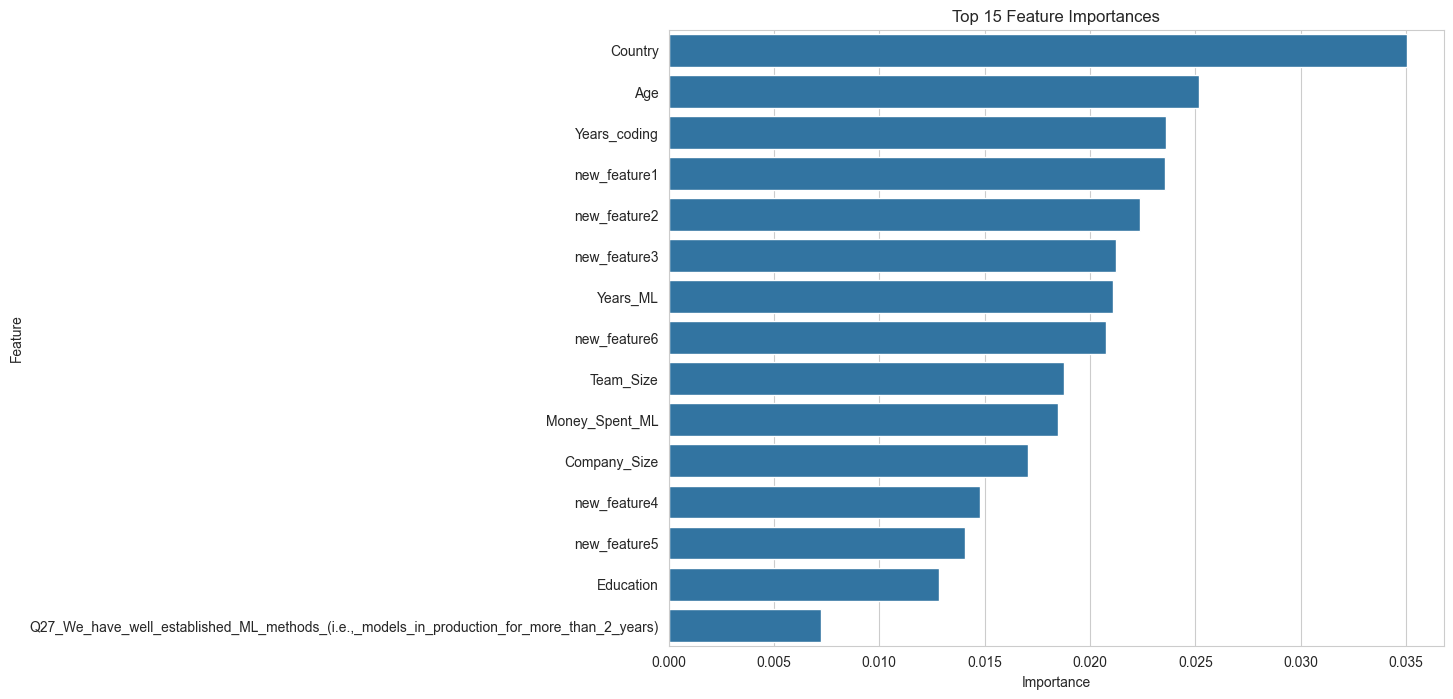

In [1773]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=1000, random_state=1624, n_jobs=-1)

# Fit the model
rf.fit(X_test, y_test)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X_test.columns,'Importance': importances})

# Sort features by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize the top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance',y='Feature',data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.show()

In [1774]:
# Leave selected features
test_df_selected = feature_importances['Feature'].head(15).tolist()
print(test_df_selected)

# Update the testing sets
X_test_selected = X_test[test_df_selected]

['Country', 'Age', 'Years_coding', 'new_feature1', 'new_feature2', 'new_feature3', 'Years_ML', 'new_feature6', 'Team_Size', 'Money_Spent_ML', 'Company_Size', 'new_feature4', 'new_feature5', 'Education', 'Q27_We_have_well_established_ML_methods_(i.e.,_models_in_production_for_more_than_2_years)']


In [1775]:
X_train = X_train_selected.values
X_test = X_test_selected.values
y_train = y_train.values
y_test = y_test.values

# Question 3: Model Implementation

## Implement Ordinal Logistic Regression Model

In [1776]:
from sklearn.linear_model import LogisticRegression

class OrdinalLogisticRegression():
    # TODO: Add ordinal logreg hyperparameters as args to __init__
    # A dummy hyperparameter is put as a placeholder for now
    def __init__(self, max_iter=100, C=0):
        self.hyperparameter = C #TODO
        self.max_iter = max_iter

        self.classes_ = []
        self.models_ = []

    def fit(self, X, y):
        self.classes_ = sorted(np.unique(y))
        self.models_ = []

        # Train k-1 binary logistic regression models
        for i, c in enumerate(self.classes_[:-1]): # We need only k-1 classifiers
            y_i = (y > c).astype(int)
            model = LogisticRegression(max_iter=self.max_iter)
            model.fit(X, y_i)
            self.models_.append(model)

        return self

    def predict_proba(self, X):
        assert len(self.models_) > 0, "Model is not fitted yet. Run .fit() first."

        # Predicted probabilities for k-1 binary logistic regression models (initialize placeholders)
        binary_probabilities = np.empty((X.shape[0], len(self.models_), 2), dtype=float)

        # Make predictions of k-1 binary logistic regression models
        for i, model in enumerate(self.models_):
            binary_probabilities[:, i] = model.predict_proba(X)

        # Compute the probabilities to be in each class
        k = len(self.classes_)
        proba = np.empty((X.shape[0], k), dtype=float) # predicted probabilities for all the data in X (shape=(X.shape[0], k))

        proba[:, 0] = binary_probabilities[:, 0, 0] # 0th probability

        for i in range(1, k-1):
            # ith probability 
            # (prob of belonging to class 0 for the ith model - prob of belonging to class 0 for the (i-1)th model
            proba[:, i] = binary_probabilities[:, i, 0] - binary_probabilities[:, i-1, 0]

        proba[:, -1] = binary_probabilities[:, k-2, 1] # (k-1)th probability

        assert (proba.sum(axis=1) == 1).all(), \
            'There is a problem in the probability computation'
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis = 1)

    # Add hyperparameters here whenever you add new ones
    # max_iter is added as an example here. key is the hyperparameter name, 
    # and value is the attribute name you defined in this class
    def get_params(self, deep=True):
        return {'max_iter': self.max_iter}

    # DO NOT CHANGE
    def set_params(self, **parameters):
        # Set estimator parameters
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Run k-fold cross validation

- Report the average/variance of accuracies across folds

In [1777]:
# Initialize k-fold cross-validation
k = 10  
kf = KFold(n_splits=k, shuffle=True, random_state=1624)

# Initialize a list to store accuracies
accuracies = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    # Use .iloc for positional indexing
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]
    
    # Initialize the model
    model = OrdinalLogisticRegression(max_iter=100, C=1.0)
    
    # Fit the model
    model.fit(X_tr, y_tr)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Compute accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    
    # Print accuracy for this fold
    print(f'Accuracy for fold {fold}: {acc}')

# After the loop, print out all accuracies and the average
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)
print("Average accuracy    : ", mean_accuracy)
print("Variance of accuracy: ", variance_accuracy)

Accuracy for fold 1: 0.3493150684931507
Accuracy for fold 2: 0.3926940639269406
Accuracy for fold 3: 0.3310502283105023
Accuracy for fold 4: 0.3812785388127854
Accuracy for fold 5: 0.3333333333333333
Accuracy for fold 6: 0.3698630136986301
Accuracy for fold 7: 0.3264840182648402
Accuracy for fold 8: 0.3470319634703196
Accuracy for fold 9: 0.3515981735159817
Accuracy for fold 10: 0.3340961098398169
Average accuracy    :  0.3516744511666301
Variance of accuracy:  0.0004622270805613476


## Bias-variance trade-off

[bias_variance_decomp.py](https://github.com/rasbt/mlxtend/blob/master/mlxtend/evaluate/bias_variance_decomp.py)

Below is a function you can use to compute the bias and variance of your ordinal logistic regression model. Using this function, analyze the ordinal logistic regression model performance based on bias-variance trade-off.

In [1778]:
### NOTE: You don't need to change anything in this code block! ###

def _draw_bootstrap_sample(rng, X, y):
    sample_indices = np.arange(X.shape[0])
    bootstrap_indices = rng.choice(
        sample_indices, size=sample_indices.shape[0], replace=True
    )
    return X[bootstrap_indices], y[bootstrap_indices]

def bias_variance_decomp(
    estimator,
    X_train,
    y_train,
    X_test,
    y_test,
    num_rounds=10,
    random_seed=0
):
    """
    estimator : object
        A classifier or regressor object or class implementing both a
        `fit` and `predict` method similar to the scikit-learn API.

    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.

    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.

    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.

    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_test` examples.

    num_rounds : int (default=10)
        Number of bootstrap rounds (sampling from the training set)
        for performing the bias-variance decomposition. Each bootstrap
        sample has the same size as the original training set.

    random_seed : int (default=0)
        Random seed for the bootstrap sampling used for the
        bias-variance decomposition.

    Returns
    ----------
    avg_bias, avg_var : returns the average bias, and average bias (all floats),
                        where the average is computed over the data points
                        in the test set.

    """
    loss = "mse"

    for ary in (X_train, y_train, X_test, y_test):
        assert type(ary) == np.ndarray, \
            "X_train, y_train, X_test, y_test have to be NumPy array. \
            If e.g., X_train is a pandas DataFrame, convert it to NumPy array \
            via X_train=X_train.values."

    rng = np.random.RandomState(random_seed)

    # All the predictions across different rounds
    all_pred = np.zeros((num_rounds, y_test.shape[0]), dtype=np.float64)

    for i in range(num_rounds):
        # Randomly sample training data
        X_boot, y_boot = _draw_bootstrap_sample(rng, X_train, y_train)

        # Fit the model using the randomly sampled data
        pred = estimator.fit(X_boot, y_boot).predict(X_test)
        all_pred[i] = pred

    # Mean prediction across runs using different dataset for each data point
    main_predictions = np.mean(all_pred, axis=0)

    # Average bias across different rounds
    avg_bias = np.sum((main_predictions - y_test) ** 2) / y_test.size

    # Average variance across different rounds
    avg_var = np.sum((main_predictions - all_pred) ** 2) / all_pred.size

    return avg_bias, avg_var

In [1779]:
# Usage example
model = OrdinalLogisticRegression()
avg_bias, avg_var = \
    bias_variance_decomp(model, X_train, y_train, X_test, y_test, num_rounds=10, random_seed=0)

In [1780]:
print(avg_bias, avg_var)

94.47800319488817 2.7724227902023433


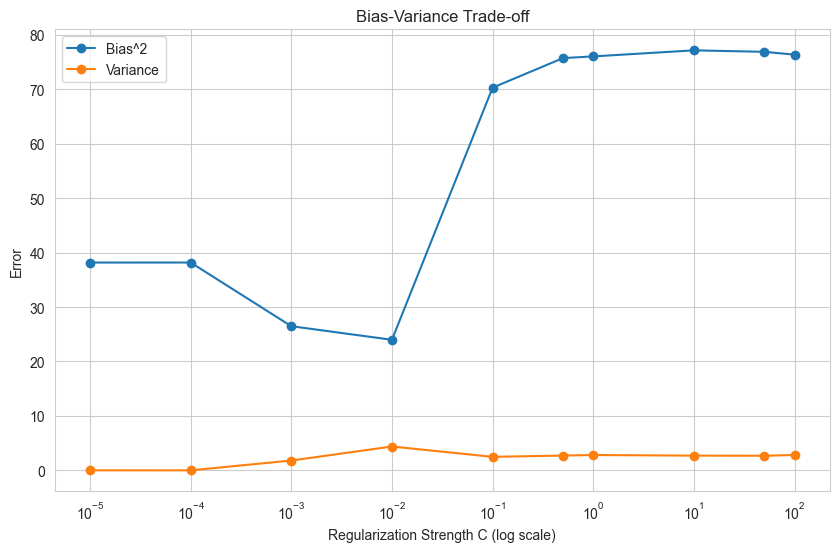

In [ ]:
#TODO: Discuss bias-variance trade-off of your ordinal logistic regression model
# Define the range of C values
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100]

# Initialize lists to store bias and variance
bias_list = []
variance_list = []

# Loop over C values
for C in C_values:
    # Initialize the estimator
    estimator = LogisticRegression(C=C, max_iter=1000)
    
    # Compute bias and variance
    avg_bias, avg_var = bias_variance_decomp(
        estimator,
        X_train,
        y_train,
        X_test,
        y_test,
        num_rounds=10,
        random_seed=42
    )
    
    # Store the results
    bias_list.append(avg_bias)
    variance_list.append(avg_var)

# Plot the bias-variance trade-off
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, bias_list, label='Bias^2', marker='o')
plt.semilogx(C_values, variance_list, label='Variance', marker='o')
plt.xlabel('Regularization Strength C (log scale)')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

# Question 4: Model Tuning

- What are the hyperparameters we can potentially set for our ordinal logistic regression model?<p>
C and max iter
- Which hyperparameters seem to be worthwhile to tune? <p>
The regularization strength C is a key hyperparameter in the Ordinal Logistic Regression model that directly influences the bias-variance trade-off. Small C values apply strong regularization, which results a higher bias and a lower variance. On the other hands the larger C reduce bias but increase variance. In the Appendix 4, we observe that at very small C values, the bias is high, and the variance is small. As C increases, the bias drops, indicating an improved fit. However, beyond 10^-2, the bias rises sharply, likely due to over-regularization. Therefore, the optimal C value for balancing bias and variance appears to be between 10^-3and 10^-2, where the model achieves the best trade-off between accuracy and generalization.

In [ ]:
# Calculate the counts of each class in y_train
unique_classes, counts = np.unique(y_train, return_counts=True)

# Calculate the proportion of each class
class_proportions = counts / len(y_train)

# Create an array of all classes from 0 to 14
all_classes = np.arange(15)  

# Initialize an array to hold the proportions, filled with zeros
proportions = np.zeros(len(all_classes))

# Fill in the proportions for the classes that are present in y_train
for idx, cls in enumerate(unique_classes):
    # Ensure that the class label is an integer index
    class_index = int(cls)
    proportions[class_index] = class_proportions[idx]

# Create a DataFrame with columns named from '0' to '14'
class_proportion_df = pd.DataFrame([proportions], columns=[str(i) for i in range(15)])

# Display the DataFrame
print(class_proportion_df)

          0         1         2         3         4         5         6  \
0  0.342087  0.099794  0.074446  0.054122  0.053437  0.042019  0.044302   

          7         8        9        10        11        12        13  \
0  0.036995  0.026947  0.02786  0.054579  0.041562  0.047043  0.035853   

         14  
0  0.018954  


## Grid Search

- Grid search will take time to complete - but if it does not finish in a few hours, you're probably trying too many combinations
- A recommended approach is to try a small number of combinations with a wide range first (for continuous value hyperparameters)! Then gradually increase the points that seem to be near optimal

In [1789]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
# Define the hyperparameter grid
param_grid = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 300, 400, 500, 600, 700]
}

# Initialize the model
model = OrdinalLogisticRegression()

# Create a custom scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring= f1_scorer,
    cv=5,  
    n_jobs=-1  
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'C': 0.0001, 'max_iter': 200}
Best cross-validation score:  0.2838479975990931


## Visualize the feature importance of your model

In [ ]:
model = OrdinalLogisticRegression(max_iter=200 , C= 0.0001) #TODO: set the best-performing hyperparameters identified via grid search
model = model.fit(X_train, y_train)

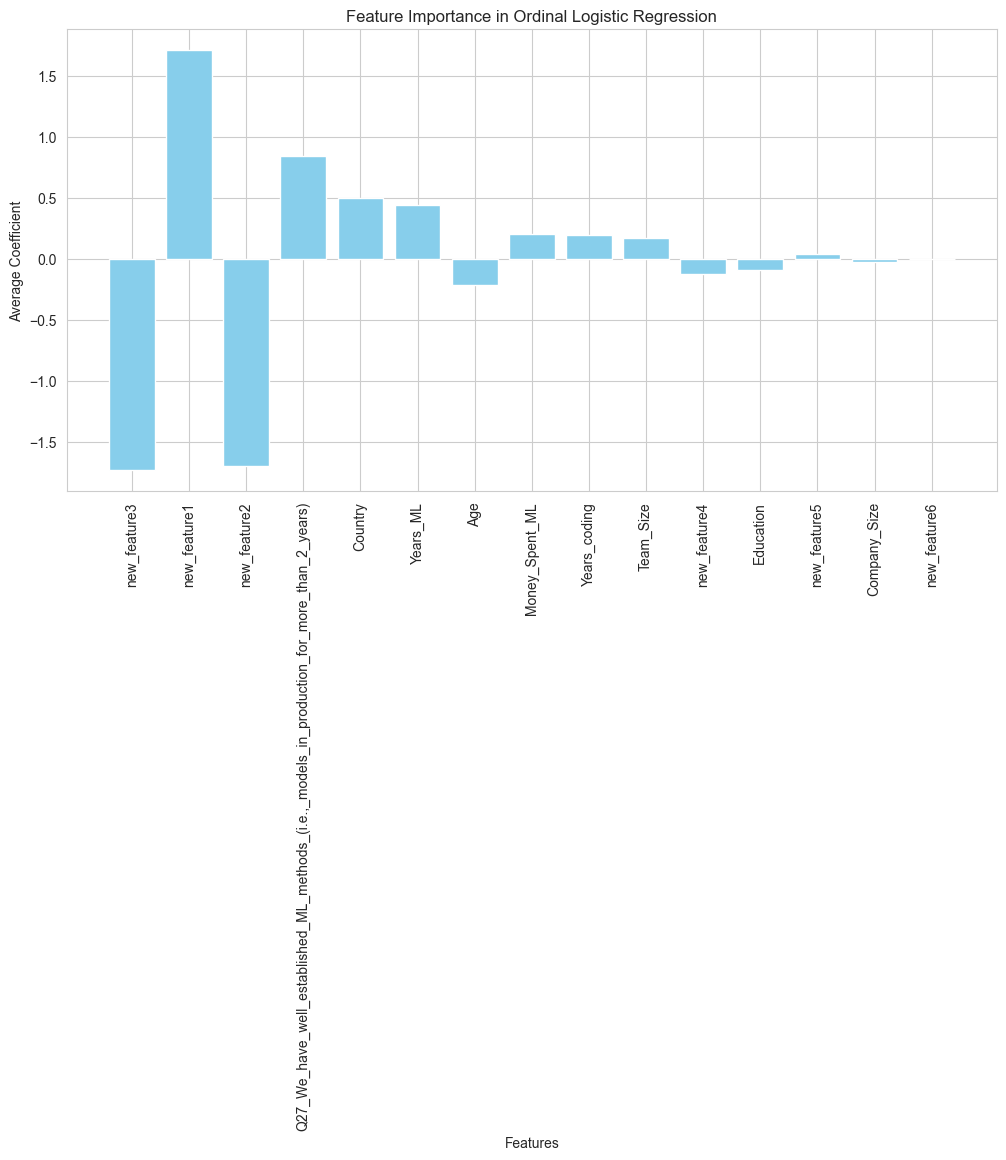

In [1791]:
#TODO: Visualize feature importance of the ordinal logistic regression model
# Plot the feature importance graph.
# Collect coefficients from each binary logistic regression model
coef_list = []
for model_binary in model.models_:
    coef_list.append(model_binary.coef_.flatten())

# Convert list of coefficients to a NumPy array
coef_array = np.array(coef_list)  # Shape: (n_models, n_features)

# Compute the average coefficients across all models
avg_coefs = np.mean(coef_array, axis=0)  # Shape: (n_features,)

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': train_df_selected,
    'Coefficient': avg_coefs
})

# Calculate absolute coefficients for sorting
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Average Coefficient')
plt.title('Feature Importance in Ordinal Logistic Regression')
plt.tight_layout()
plt.show()

# Question 5: Testing

In [1797]:
# Get predictions for both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Get probability predictions for test set
y_test_pred_proba = model.predict_proba(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_acc = accuracy_score(y_train, y_train_pred)

# Calculate metrics for test set  
test_mae = mean_absolute_error(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"F1 Score (weighted): {train_f1:.4f}")
print(f"Accuracy: {train_acc:.4f}")

print("\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}") 
print(f"F1 Score (weighted): {test_f1:.4f}")
print(f"Accuracy: {test_acc:.4f}")

Training Set Performance:
Mean Absolute Error (MAE): 2.4503
F1 Score (weighted): 0.2911
Accuracy: 0.3688

Test Set Performance:
Mean Absolute Error (MAE): 8.8259
F1 Score (weighted): 0.0965
Accuracy: 0.0788


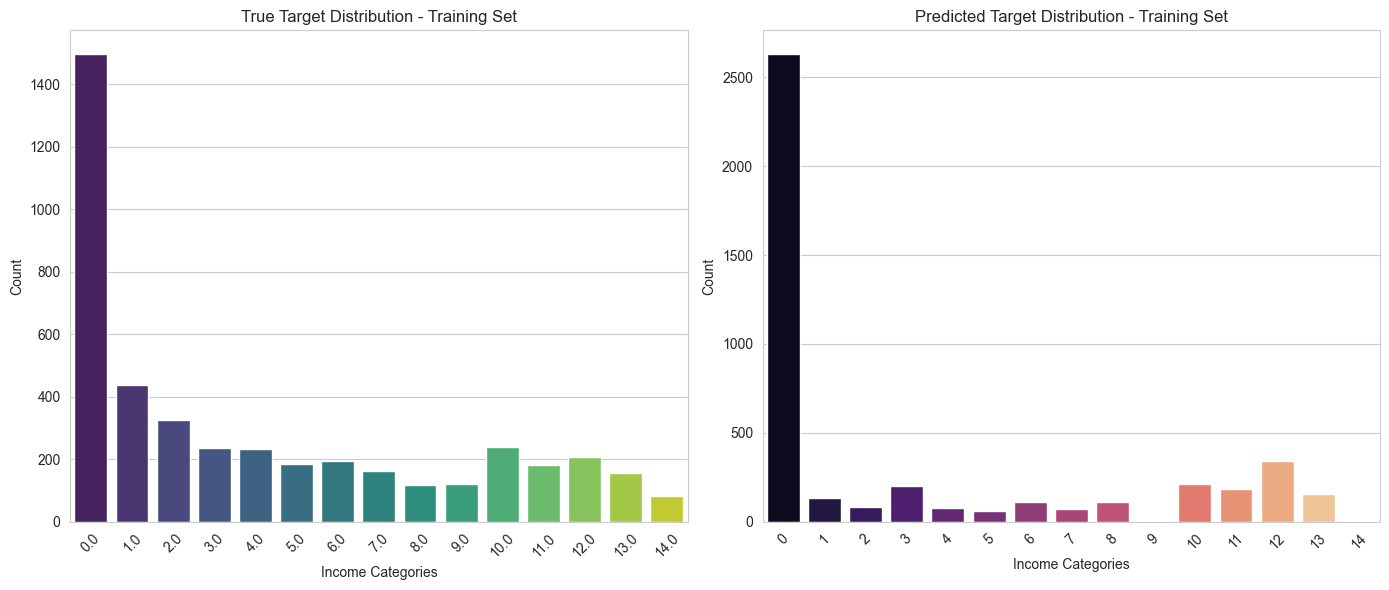

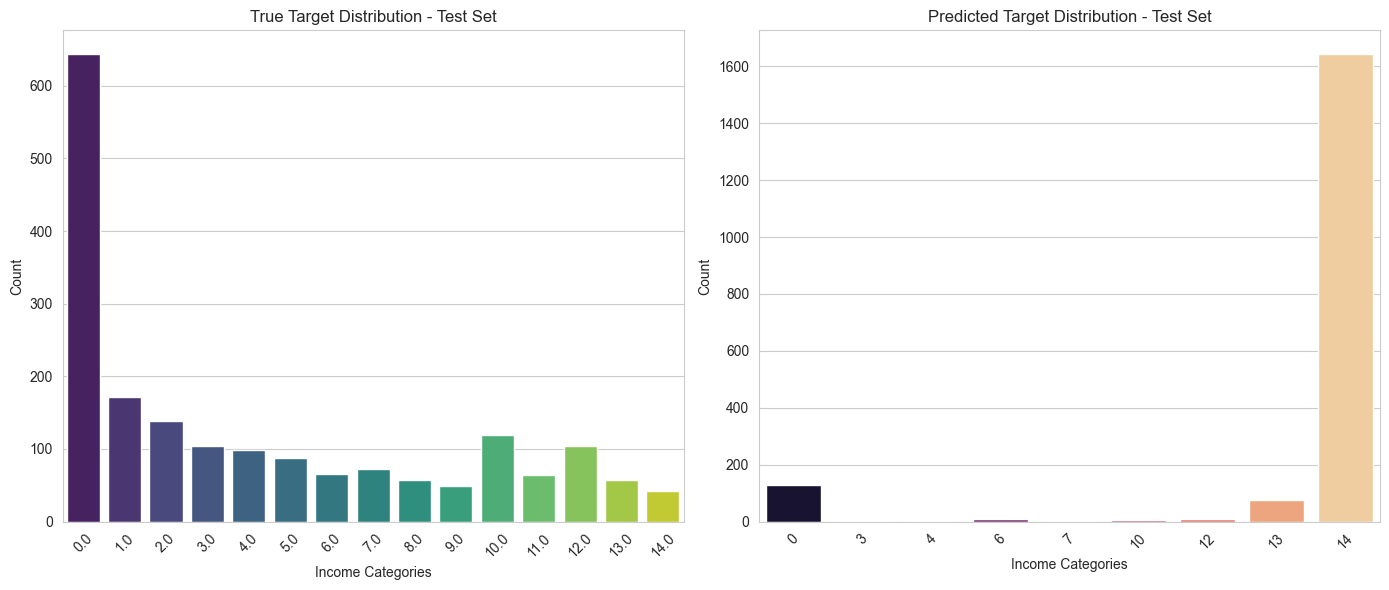

In [1796]:
# Plot distribution on the training set
plt.figure(figsize=(14, 6))

# True target variable distribution on training set
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('True Target Distribution - Training Set')
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Predicted target variable distribution on training set
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_pred, palette='magma')
plt.title('Predicted Target Distribution - Training Set')
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot distribution on the test set
plt.figure(figsize=(14, 6))

# True target variable distribution on test set
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette='viridis')
plt.title('True Target Distribution - Test Set')
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Predicted target variable distribution on test set
plt.subplot(1, 2, 2)
sns.countplot(x=y_test_pred, palette='magma')
plt.title('Predicted Target Distribution - Test Set')
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
